In [38]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import seaborn as sns 


#reading the data 
data_nan = pd.read_csv('C:/Users/teddi/OneDrive/Desktop/Traffic_Violations.csv', low_memory = False)
print(data_nan.shape)



(1048575, 35)


In [39]:
#removing all rows with missing values and all values outside of the years 2010 and 2020
data = data_nan.dropna().reset_index(drop=True)
data = data[(2005 <= data['Year']) & (data['Year'] <= 2018)]

print(data.shape[0])
data.head(5)


569323


,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
4,02/14/2014,20:10:00,MCP,"1st district, Rockville",FAILURE TO DRIVE ON RIGHT HAND ROADWAY OF DIVI...,GATEWAY CENTER DR @ CLARKSBURG RD,39.234843,-77.281540,No,No,...,21-311(1),Transportation Article,No,WHITE,M,POINT OF ROCK,MD,WV,A - Marked Patrol,"(39.2348434333333, -77.28153995)"
7,12/20/2012,0:41:00,MCP,"2nd district, Bethesda",DRIVING WHILE IMPAIRED BY ALCOHOL,NORFOLK AVE / ST ELMO AVE,38.983578,-77.093105,No,No,...,21-902(b1),Transportation Article,No,WHITE,M,DERWOOD,MD,MD,A - Marked Patrol,"(38.9835782, -77.09310515)"
9,9/11/2012,21:47:00,MCP,"4th district, Wheaton",PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...,TWIG RD AT GOOD HOPE RD,39.096199,-76.986962,No,Yes,...,16-303(d),Transportation Article,No,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.09619885, -76.98696215)"
12,12/17/2015,13:15:00,MCP,"5th district, Germantown",FAILURE TO RETURN TO & REMAIN AT SCENE OF ACCI...,19916 CRYSTAL ROCK DR,39.222793,-77.253690,No,No,...,20-103(b),Transportation Article,No,BLACK,M,ROCKVILLE,MD,MD,A - Marked Patrol,"(39.2227933333333, -77.25369)"
15,08/29/2017,1:56:00,MCP,"6th district, Gaithersburg / Montgomery Village",DRIVING MOTOR VEHICLE ON HIGHWAY WITHOUT REQU...,KENTLANDS BLVD@GREAT SENECA HWY,39.123242,-77.232998,No,No,...,16-101(a),Transportation Article,No,HISPANIC,M,CLARKSBURG,MD,MD,A - Marked Patrol,"(39.1232416666667, -77.2329983333333)"


In [59]:
#to see how many unique values in each column 
# for i in data.columns:
#     print(i ," -> ", data[i].unique().shape[0])



In [40]:
#the value count for each car model and storing in a numpy array 
numbers_np = data["Model"].value_counts().to_numpy()
numbers_make = data["Make"].value_counts().to_numpy()

u1 = data["Model"].unique().shape[0]
u2 = data["Make"].unique().shape[0]
print(f"The original unique Model inputs is: {u1}")
print(f"The original unique Make inputs is: {u2}")


#get the names (the .index gets the names instead of the values)
names_np = data['Model'].value_counts().index.to_numpy()
names_np_make = data['Make'].value_counts().index.to_numpy()


names_to_turn_to_other = []
names_to_turn_to_other_make = []

#turn any Model with less than 2000 value count into other -> reduces the number of unique inputs
for i in range(len(numbers_np)):
    if numbers_np[i] <= 2000:
        names_to_turn_to_other.append(names_np[i])

rows_to_remove = data[data.Model.isin(names_to_turn_to_other)].index
rows_list = rows_to_remove.tolist()
data.loc[rows_list, 'Model'] = 'Others'

#now there should only be 14 unique car models. 



#new

for i in range(len(numbers_make)):
    if numbers_make[i] <= 500:
        names_to_turn_to_other_make.append(names_np_make[i])

rows_to_remove_make = data[data.Make.isin(names_to_turn_to_other_make)].index
rows_list_make = rows_to_remove_make.tolist()


data.loc[rows_list_make, 'Make'] = 'Others'

u3 = data["Model"].unique().shape[0]
u4 = data["Make"].unique().shape[0]

print("")
print(f"This has been reduced to {u3} unique inputs")
print(f"This has been reduced to {u4} unique inputs")


The original unique Model inputs is: 9707
The original unique Make inputs is: 2277

This has been reduced to 47 unique inputs
This has been reduced to 68 unique inputs


In [232]:
# sns.distplot(data['Longitude'])
# plt.show()
# sns.distplot(data['Latitude'])
# plt.show()

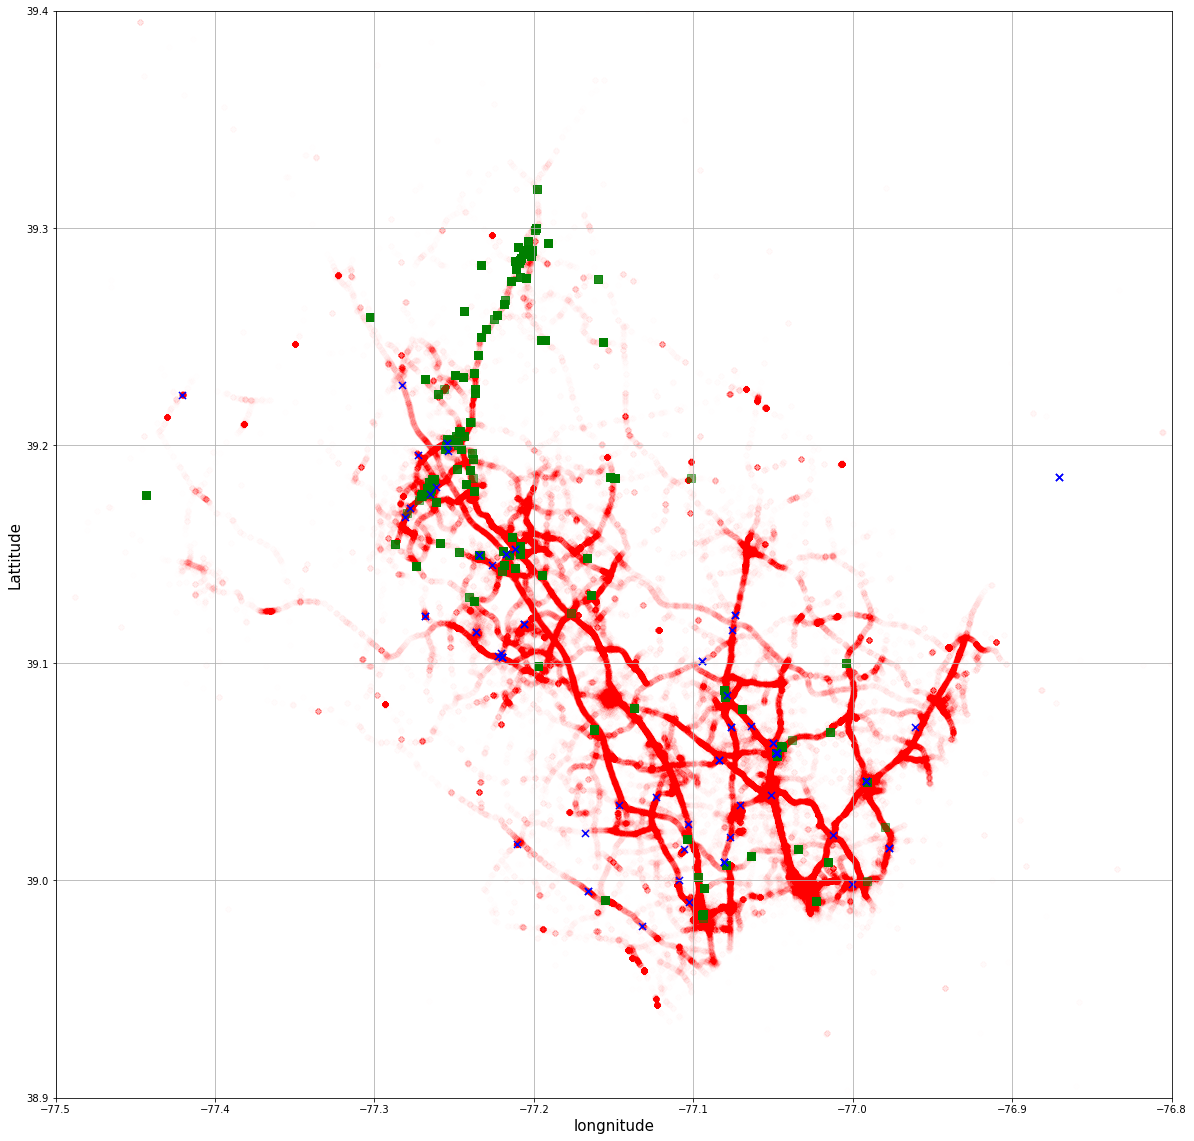

In [41]:
# from mpl_toolkits.basemap import Basemap


#fatalities 
Fatal_ = data.loc[data["Fatal"] == "Yes"]
alcohol_ = data.loc[data["Alcohol"] == "Yes"]

lon_min, lon_max, lat_min, lat_max = (data['Longitude'].min(), data['Longitude'].max(), data['Latitude'].min(), data['Latitude'].max())
lon_min_F, lon_max_F, lat_min_F, lat_max_F = (Fatal_['Longitude'].min(), Fatal_['Longitude'].max(), Fatal_['Latitude'].min(), Fatal_['Latitude'].max())
lon_min_A, lon_max_A, lat_min_A, lat_max_A = (alcohol_['Longitude'].min(), alcohol_['Longitude'].max(), alcohol_['Latitude'].min(), alcohol_['Latitude'].max())

# lon_center, lat_center = ((lon_min+lon_max)/2, (lat_min+lat_max)/2)


plt.figure(figsize=(20,20))

#plotting the latitude and longitude 
plt.scatter(data['Longitude'].values, data['Latitude'].values, marker='o', alpha=0.005, color='red', s=30)
plt.scatter(alcohol_['Longitude'].values, alcohol_['Latitude'].values, marker='s', alpha=0.5,color='g', s=50)
plt.scatter(Fatal_['Longitude'].values, Fatal_['Latitude'].values, marker='x', color='b', s=50)




plt.xlim(-77.5,-76.8)
plt.ylim(38.9,39.4)
plt.grid(which = 'both')
plt.grid(which = 'minor', linestyle = '-', axis = 'both')
plt.xlabel("longnitude",size = 15)
plt.ylabel("Lattitude",size = 15)
plt.show()




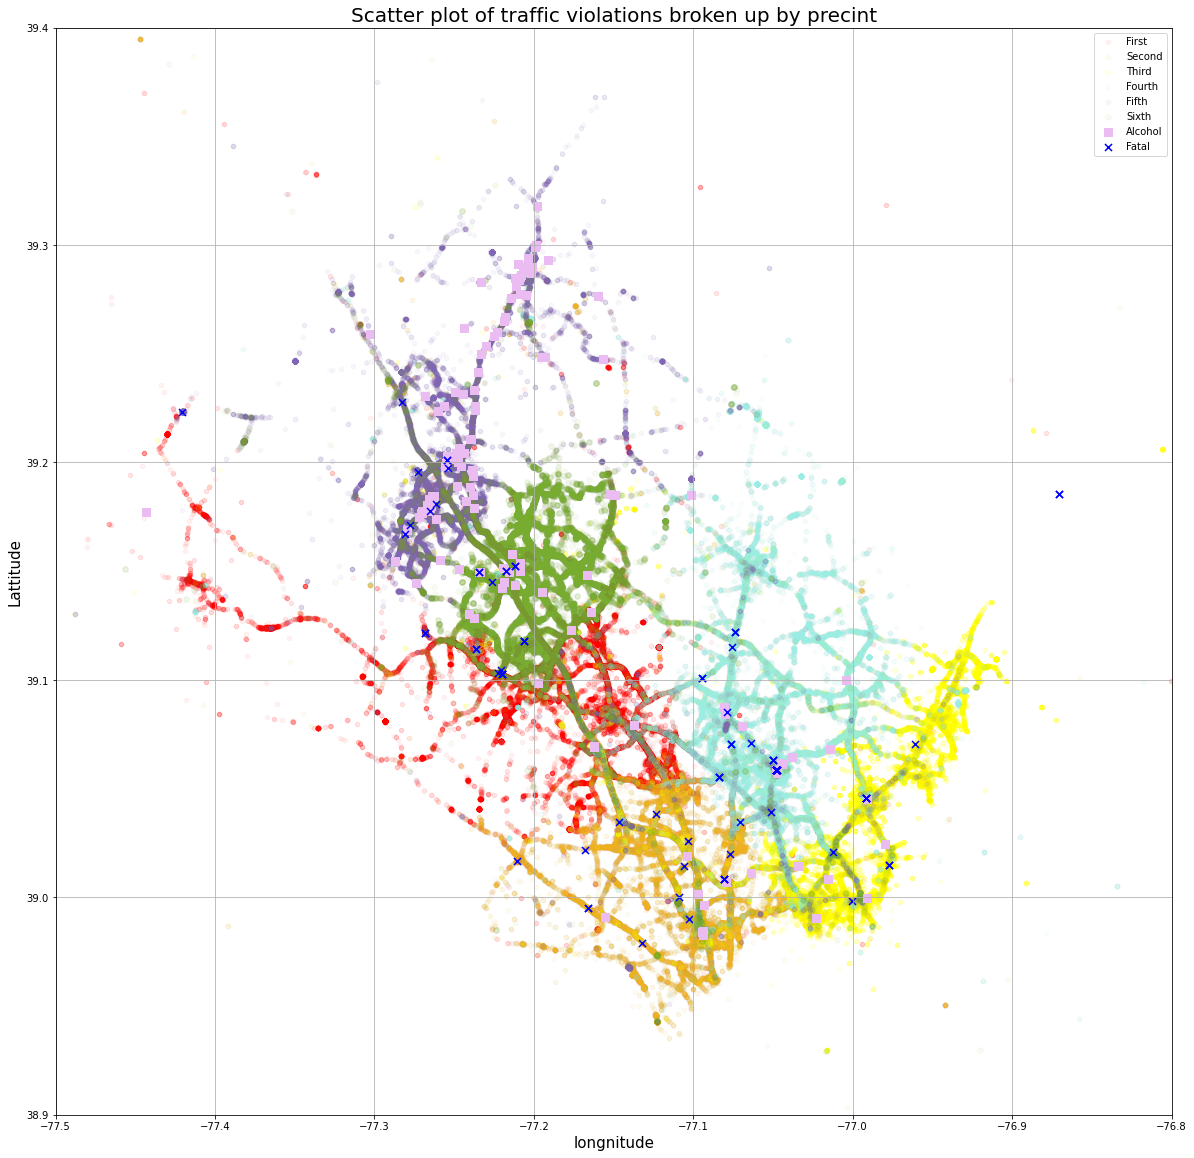

In [42]:
#this code essentially copies the code above, but colour codes the precincts 
first = data.loc[data["SubAgency"] == "1st district, Rockville"]
second = data.loc[data["SubAgency"] == "2nd district, Bethesda"]
third = data.loc[data["SubAgency"] == "3rd district, Silver Spring"]
fourth = data.loc[data["SubAgency"] == "4th district, Wheaton"]
fifth = data.loc[data["SubAgency"] == "5th district, Germantown"]
sixth = data.loc[data["SubAgency"] == "6th district, Gaithersburg / Montgomery Village"]

lon_min_1, lon_max_1, lat_min_1, lat_max_1 = (first['Longitude'].min(), first['Longitude'].max(), first['Latitude'].min(), first['Latitude'].max())
lon_min_2, lon_max_2, lat_min_2, lat_max_2 = (second['Longitude'].min(), second['Longitude'].max(), second['Latitude'].min(), second['Latitude'].max())
lon_min_3, lon_max_3, lat_min_3, lat_max_3 = (third['Longitude'].min(), third['Longitude'].max(), third['Latitude'].min(), third['Latitude'].max())
lon_min_4, lon_max_4, lat_min_4, lat_max_4 = (fourth['Longitude'].min(),fourth['Longitude'].max(),fourth['Latitude'].min(),fourth['Latitude'].max())
lon_min_5, lon_max_5, lat_min_5, lat_max_5 = (fifth['Longitude'].min(), fifth['Longitude'].max(), fifth['Latitude'].min(), fifth['Latitude'].max())
lon_min_6, lon_max_6, lat_min_6, lat_max_6 = (sixth['Longitude'].min(),sixth['Longitude'].max(),sixth['Latitude'].min(),sixth['Latitude'].max())

plt.figure(figsize=(20,20))


plt.scatter(first['Longitude'].values, first['Latitude'].values, marker='o', alpha=0.05, color='red', s=20)
plt.scatter(second['Longitude'].values,second['Latitude'].values, marker='o', alpha=0.05, color='#EDB120', s=20) #orange  
plt.scatter(third['Longitude'].values, third['Latitude'].values, marker='o', alpha=0.08, color='yellow', s=20)  
plt.scatter(fourth['Longitude'].values, fourth['Latitude'].values, marker='o', alpha=0.05, color='#9BEDE4', s=20) #cyan
plt.scatter(fifth['Longitude'].values,fifth['Latitude'].values, marker='o', alpha=0.05, color='#8066B4', s=20)  #purple 
plt.scatter(sixth['Longitude'].values, sixth['Latitude'].values, marker='o', alpha=0.05, color='#77AC30', s=30)  #green
plt.scatter(alcohol_['Longitude'].values, alcohol_['Latitude'].values, marker='s', alpha=1,color='#EABCF1', s=50)  #pink
plt.scatter(Fatal_['Longitude'].values, Fatal_['Latitude'].values, marker='x', color='b', s=50)


plt.xlim(-77.5,-76.8)
plt.ylim(38.9,39.4)
plt.grid(which = 'both')
plt.grid(which = 'minor', linestyle = '-', axis = 'both')
plt.title("Scatter plot of traffic violations broken up by precint", size = 20)
plt.xlabel("longnitude",size = 15)
plt.ylabel("Lattitude",size = 15)
plt.legend(["First", "Second", "Third", "Fourth", "Fifth", "Sixth", "Alcohol", "Fatal"])
plt.show()


In [6]:
data.head(5)


,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
4,02/14/2014,20:10:00,MCP,"1st district, Rockville",FAILURE TO DRIVE ON RIGHT HAND ROADWAY OF DIVI...,GATEWAY CENTER DR @ CLARKSBURG RD,39.234843,-77.281540,No,No,...,21-311(1),Transportation Article,No,WHITE,M,POINT OF ROCK,MD,WV,A - Marked Patrol,"(39.2348434333333, -77.28153995)"
7,12/20/2012,0:41:00,MCP,"2nd district, Bethesda",DRIVING WHILE IMPAIRED BY ALCOHOL,NORFOLK AVE / ST ELMO AVE,38.983578,-77.093105,No,No,...,21-902(b1),Transportation Article,No,WHITE,M,DERWOOD,MD,MD,A - Marked Patrol,"(38.9835782, -77.09310515)"
9,9/11/2012,21:47:00,MCP,"4th district, Wheaton",PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...,TWIG RD AT GOOD HOPE RD,39.096199,-76.986962,No,Yes,...,16-303(d),Transportation Article,No,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.09619885, -76.98696215)"
12,12/17/2015,13:15:00,MCP,"5th district, Germantown",FAILURE TO RETURN TO & REMAIN AT SCENE OF ACCI...,19916 CRYSTAL ROCK DR,39.222793,-77.253690,No,No,...,20-103(b),Transportation Article,No,BLACK,M,ROCKVILLE,MD,MD,A - Marked Patrol,"(39.2227933333333, -77.25369)"
15,08/29/2017,1:56:00,MCP,"6th district, Gaithersburg / Montgomery Village",DRIVING MOTOR VEHICLE ON HIGHWAY WITHOUT REQU...,KENTLANDS BLVD@GREAT SENECA HWY,39.123242,-77.232998,No,No,...,16-101(a),Transportation Article,No,HISPANIC,M,CLARKSBURG,MD,MD,A - Marked Patrol,"(39.1232416666667, -77.2329983333333)"


[0.0222, 0.0528, 0.0159, 0.0785, 0.7776, 0.1669]
[0.0083, 0.0179, 0.0094, 0.0167, 0.0152, 0.0086]
[1.0014, 1.4556, 1.205, 1.3362, 1.26, 1.1109]
[1.9959, 3.0418, 2.4971, 2.8439, 1.9311, 2.2909]
[73.8942, 79.0806, 87.9775, 83.4622, 72.7455, 74.3535]
[72099, 100304, 106642, 137630, 65714, 69491]


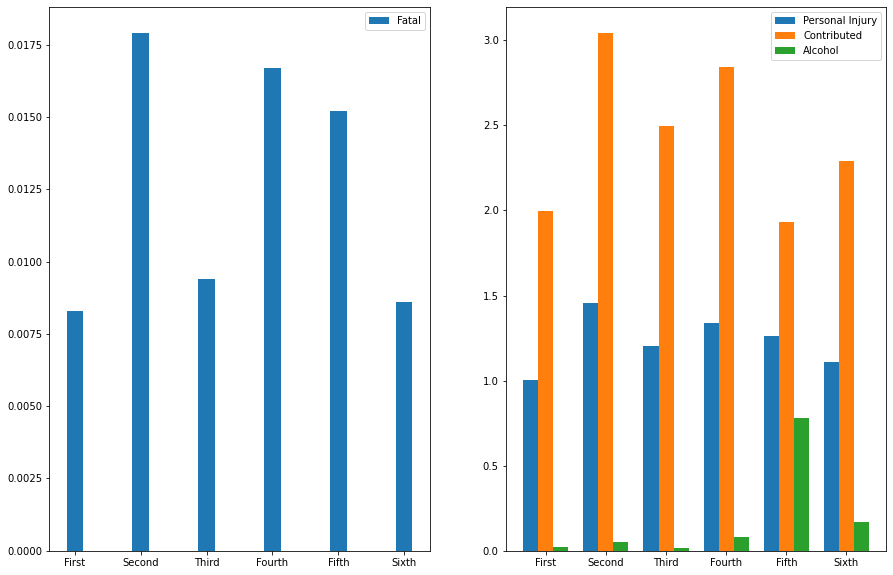

6
6


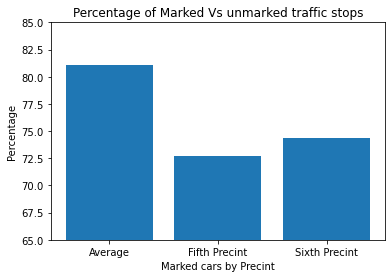

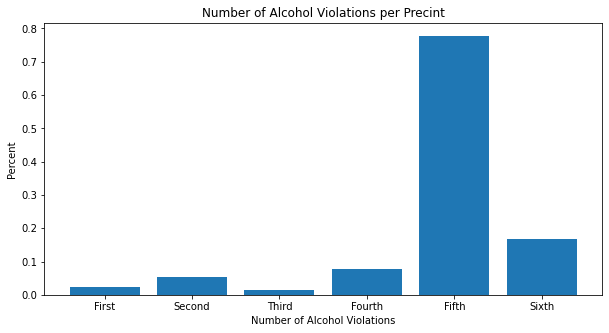

In [43]:
#separates each of the precincts data into a list 
arrests = [first.shape[0], second.shape[0], third.shape[0], fourth.shape[0], fifth.shape[0], sixth.shape[0]]

list_names = [first,second,third, fourth, fifth, sixth]
list_name_names = ["First","Second","Third", "Fourth", "Fifth", "Sixth"]
alcohol_raw_districts = []
fatal_raw_districts = []
alcohol_percent_districts = []
fatal_percent_districts = []
personal_injury_percent_districts = []
contributed_percent_districts = []
marked_percent = []

counter = 0

#counting the number of times each precinct makes an arrest for certain violations (i.e. counts how many times the first precint makes an alcohol arrest)
for i in list_names:
    a = i["Alcohol"][i["Alcohol"] == "Yes"].shape[0] 
    f = i["Fatal"][i["Fatal"] == "Yes"].shape[0]
    p = i["Personal Injury"][i["Personal Injury"] == "Yes"].shape[0]
    c = i["Contributed To Accident"][i["Contributed To Accident"] == "Yes"].shape[0]
    m = i["Arrest Type"][i["Arrest Type"] == "A - Marked Patrol"].shape[0]
    
    #turns the absolute numbers into a percentage of arrests (arrests[counter] should be the total number of arreasts each precint has made)
    A = round((a/arrests[counter])*100,4)
    F = round((f/arrests[counter])*100,4)
    P = round((p/arrests[counter])*100,4)
    C = round((c/arrests[counter])*100,4)
    M = round((m/arrests[counter])*100,4) 
    
    #this is the absolute, numbers (not a percentage)
    alcohol_raw_districts.append(a)
    fatal_raw_districts.append(f)
    
    #append the percentages into respective lists 
    alcohol_percent_districts.append(A)
    fatal_percent_districts.append(F)
    personal_injury_percent_districts.append(P)
    contributed_percent_districts.append(C)
    marked_percent.append(M)
    
    counter += 1

# print(alcohol_percent_districts)
# print(fatal_percent_districts)
# print(personal_injury_percent_districts)
# print(contributed_percent_districts)
# print(marked_percent)
# print(arrests)


#plotting the above data 
X_axis = np.arange(len(list_name_names))
width = 0.25

plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)

bars2 = plt.bar(X_axis+width,fatal_percent_districts,width)
plt.legend(["Fatal"])
plt.xticks(X_axis+width, list_name_names)

plt.subplot(1, 2, 2)
# plt.figure(figsize = (20,10))
bars3 = plt.bar(X_axis,personal_injury_percent_districts,width)
bars4 = plt.bar(X_axis+width,contributed_percent_districts,width)
bars1 = plt.bar(X_axis+width*2,alcohol_percent_districts,width)

plt.xticks(X_axis+width,list_name_names)

plt.legend(["Personal Injury", "Contributed", "Alcohol"])
 

plt.show()

names = ["First", "Second", "Third", "Fourth", "Fifth", "Sixth"]
# print(len(names))
# print(len(marked_percent))

avg = round(sum(marked_percent[:4])/4,3)
avg


to_plot = [avg,marked_percent[4],marked_percent[5]]
plt.title("Percentage of Marked Vs unmarked traffic stops")
plt.bar(["Average", "Fifth Precint", "Sixth Precint"],to_plot)
plt.xlabel("Marked cars by Precint")
plt.ylabel("Percentage")

plt.ylim(65,85)
plt.show()

plt.figure(figsize=(10,5))

bars5 = plt.bar(["First", "Second", "Third", "Fourth", "Fifth", "Sixth"],alcohol_percent_districts)
plt.title("Number of Alcohol Violations per Precint")
plt.xlabel("Number of Alcohol Violations")
plt.ylabel("Percent")
plt.show()

<Figure size 432x288 with 0 Axes>

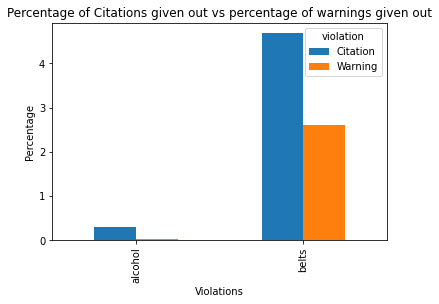

violation,Citation,Warning
alcohol,0.285433,0.014170
belts,4.688571,2.594208


In [33]:
#looking at how alcohol and seatbelt violations are punished 
sub_df1 = pd.DataFrame(zip(data['Violation Type'],data['Alcohol'],data['Belts'],data['Fatal']), columns=['violation','alcohol','belts','fatal'])
sub_df1['alcohol'] = sub_df1.alcohol.eq('Yes').mul(1)
sub_df1['belts'] = sub_df1.belts.eq('Yes').mul(1)
# sub_df1['fatal'] = sub_df1.fatal.eq('Yes').mul(1)
table1 = pd.pivot_table(sub_df1, values=['alcohol','belts'], columns='violation', aggfunc=np.mean)
table1 = table1*100

table2 = table1.drop(["SERO"],axis=1)

plt.figure()
table2.plot(kind='bar')
plt.title("Percentage of Citations given out vs percentage of warnings given out")
plt.ylabel("Percentage")
plt.xlabel("Violations")
plt.show()
table2


In [44]:
from datetime import datetime

#breaking up the data into the day of the week 
# data["Date Of Stop"] = data["Date Of Stop"].astype(int)
new = data["Date Of Stop"].str.split("/", n = 2, expand = True)

# new = new.astype(int)
year = new[2]
month = new[0]
day = new[1]
#year month day 

date_of_stop = new[2].str.cat(month,sep = "/")
date_of_stop = date_of_stop.str.cat(day, sep = "/") 

#isoweekday needs to be in a particular format, pd.to_datetime puts date_of_stop into this format 
date_series = pd.to_datetime(date_of_stop)
X = date_series.iloc[1]
print(datetime.isoweekday(X))

counter = 0
for i in date_of_stop:
    var = datetime.isoweekday(date_series.iloc[counter])
    date_series.iloc[counter] = var
    counter +=1 



date_series
data.insert(0,"Day Of The Week", date_series)
data

    

4


,Day Of The Week,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
4,5,02/14/2014,20:10:00,MCP,"1st district, Rockville",FAILURE TO DRIVE ON RIGHT HAND ROADWAY OF DIVI...,GATEWAY CENTER DR @ CLARKSBURG RD,39.234843,-77.281540,No,...,21-311(1),Transportation Article,No,WHITE,M,POINT OF ROCK,MD,WV,A - Marked Patrol,"(39.2348434333333, -77.28153995)"
7,4,12/20/2012,0:41:00,MCP,"2nd district, Bethesda",DRIVING WHILE IMPAIRED BY ALCOHOL,NORFOLK AVE / ST ELMO AVE,38.983578,-77.093105,No,...,21-902(b1),Transportation Article,No,WHITE,M,DERWOOD,MD,MD,A - Marked Patrol,"(38.9835782, -77.09310515)"
9,2,9/11/2012,21:47:00,MCP,"4th district, Wheaton",PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...,TWIG RD AT GOOD HOPE RD,39.096199,-76.986962,No,...,16-303(d),Transportation Article,No,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.09619885, -76.98696215)"
12,4,12/17/2015,13:15:00,MCP,"5th district, Germantown",FAILURE TO RETURN TO & REMAIN AT SCENE OF ACCI...,19916 CRYSTAL ROCK DR,39.222793,-77.253690,No,...,20-103(b),Transportation Article,No,BLACK,M,ROCKVILLE,MD,MD,A - Marked Patrol,"(39.2227933333333, -77.25369)"
15,2,08/29/2017,1:56:00,MCP,"6th district, Gaithersburg / Montgomery Village",DRIVING MOTOR VEHICLE ON HIGHWAY WITHOUT REQU...,KENTLANDS BLVD@GREAT SENECA HWY,39.123242,-77.232998,No,...,16-101(a),Transportation Article,No,HISPANIC,M,CLARKSBURG,MD,MD,A - Marked Patrol,"(39.1232416666667, -77.2329983333333)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912605,6,4/12/2014,8:55:00,MCP,"3rd district, Silver Spring",DRIVER CHANGING LANES WHEN UNSAFE,RT. 29/ MUSGROVE RD,39.061813,-76.960707,No,...,21-309(b),Transportation Article,No,BLACK,M,RANDALLSTOWN,MD,MD,A - Marked Patrol,"(39.0618133333333, -76.9607066666667)"
912606,1,03/31/2014,18:01:00,MCP,"1st district, Rockville",DRIVING LEFT OF ROADWAY CENTER IN OVERTAKING A...,28/BIG WOODS RD,39.213260,-77.430157,No,...,21-305,Transportation Article,No,WHITE,M,FREDERICK,MD,MD,Q - Marked Laser,"(39.21326, -77.4301566666667)"
912607,2,3/04/2014,9:16:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,NEW HAMPSHIRE AVE/ WOLF,39.072878,-77.002706,No,...,13-401(h),Transportation Article,No,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0728779, -77.0027055666667)"
912608,1,02/17/2014,12:02:00,MCP,"1st district, Rockville",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,FALLS RD @ W. KERSEY,39.066527,-77.174273,No,...,13-401(h),Transportation Article,No,ASIAN,M,MONTGOMERY VILLAGE,MD,MD,A - Marked Patrol,"(39.0665266666667, -77.1742733333333)"


C:\Users\teddi\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


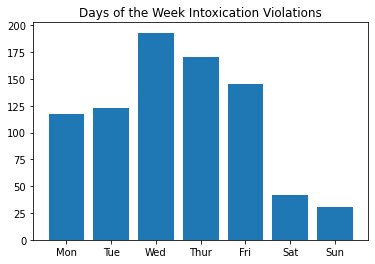

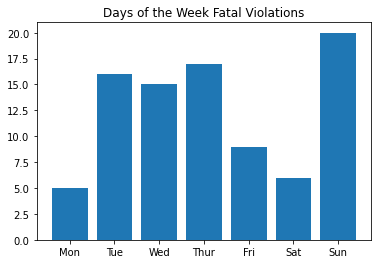

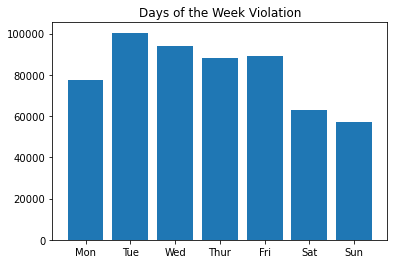

In [35]:
#plotting incidents based on the day of the week 
intoxicated_test = data[data["Alcohol"] == "Yes"]
Fatal_test = data[data["Fatal"] == "Yes"]

days_of_week = [0,1,2,3,4,5,6,7]

alc = pd.get_dummies(intoxicated_test["Day Of The Week"])
Fatals = pd.get_dummies(Fatal_test["Day Of The Week"])
time = pd.get_dummies(data["Day Of The Week"])

heights = []
heights_fatal = []
days = []

for i in alc:
    sd = alc[i].sum()
    heights.append(sd)
    
for i in Fatals:
    sd = Fatals[i].sum()
    heights_fatal.append(sd)

for i in time:
    sd = time[i].sum()
    days.append(sd)
    
    

plt.bar(["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"], heights)
plt.title("Days of the Week Intoxication Violations")
plt.show()

plt.bar(["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"], heights_fatal)
plt.title("Days of the Week Fatal Violations")
plt.show()

plt.bar(["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"], days)
plt.title("Days of the Week Violation")
plt.show()




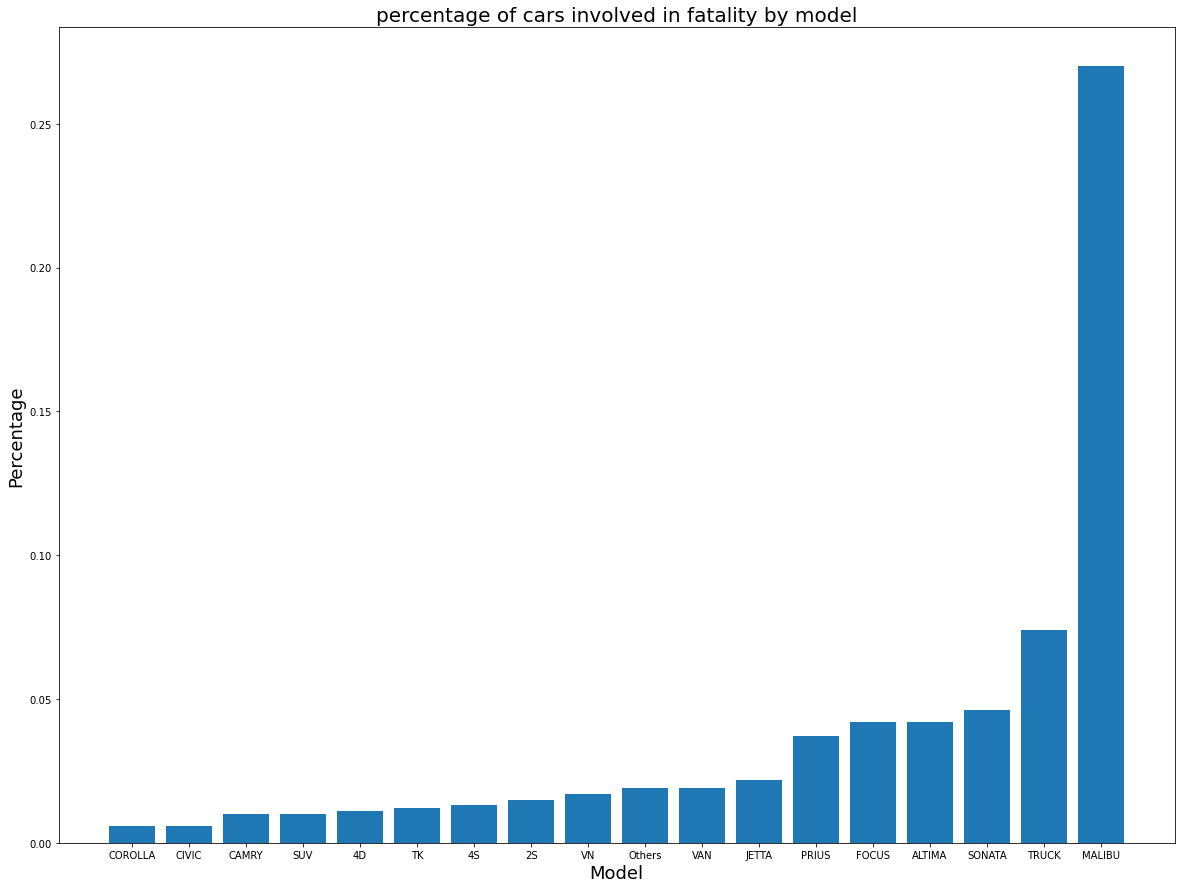

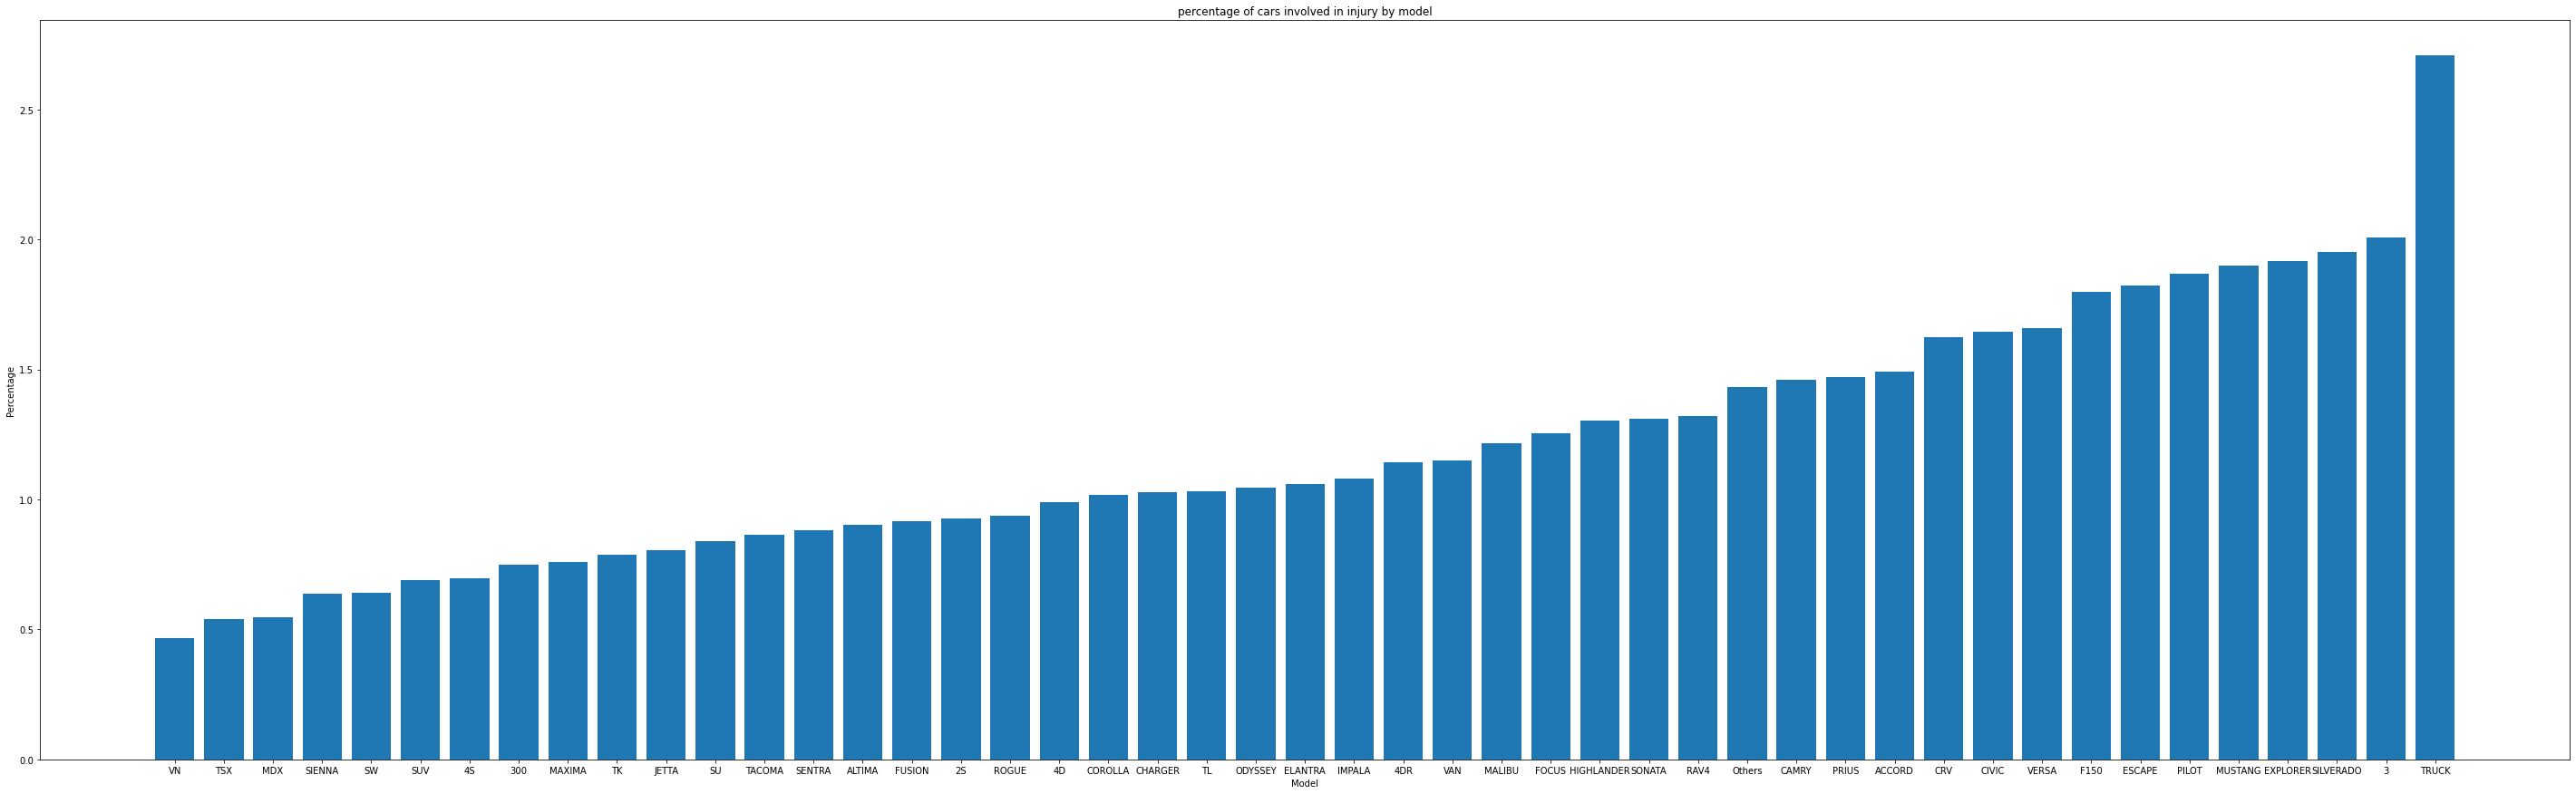

In [45]:
#finding out which car models are the most dangerous 
percent_fatal = []
number_personal_injury = []
names = []

for i in data["Model"].unique():
    x = data[data["Model"] == i].shape[0]
    Model = data[data["Model"] == i]
    F = Model[Model["Fatal"] == "Yes"].shape[0]
    
    if F == 0:
        continue
    names.append(i)
    percent = round(F/x * 100,3)
    percent_fatal.append(percent)
test_names = names 
test_fatal = percent_fatal
    
data_sort  = pd.DataFrame(dict(names1 = test_names, fatal1 = test_fatal))
df_sort  = data_sort.sort_values('fatal1')

plt.figure(figsize=(20,15))
plt.bar('names1', 'fatal1', data = df_sort)
plt.title("percentage of cars involved in fatality by model",fontsize=20)
# plt.title("Test", )

plt.ylabel("Percentage", fontsize = 18)
plt.xlabel("Model", fontsize = 18)
plt.show() 

names = []
for i in data["Model"].unique():
    x = data[data["Model"] == i].shape[0]
    Model = data[data["Model"] == i]
    F = Model[Model["Personal Injury"] == "Yes"].shape[0]

    if F == 0:
        continue
    names.append(i)
    percent = round(F/x * 100,3)
    number_personal_injury.append(percent)

test_names2 = names 
test_fata2 = number_personal_injury
    
data_sort2  = pd.DataFrame(dict(names2 = test_names2, injured2 = test_fata2))
df_sort2  = data_sort2.sort_values(by = ['injured2'])

# df_sort2  = data_sort2.sort_values('injured2')
    
plt.figure(figsize=(50,15))
plt.title("percentage of cars involved in injury by model")
plt.ylabel("Percentage")
plt.xlabel("Model")
plt.bar('names2', 'injured2',data = df_sort2 )
plt.show() 
# data_sort2


In [46]:
#dropping any column with more than 500 unique inputs
print("The columns that have been dropped: ")

columns_to_drop = []
for i in range(data.shape[1]):
    if data[data.columns[i]].unique().shape[0] > 500:
        columns_to_drop.append(data.columns[i])
        print(data.columns[i])
        
data.drop(columns_to_drop, axis = 1, inplace=True)


The columns that have been dropped: 
Date Of Stop
Time Of Stop
Description
Location
Latitude
Longitude
Charge
Driver City
Geolocation


In [47]:
#one hot encoding the dataframe 'encoded', but the target (Personal Injury) will be label encoded 
data_one_hot_encode = data.copy()
data_one_hot_encode.head()

to_encode = data_one_hot_encode.columns
data_one_hot_encode.loc[data_one_hot_encode['Personal Injury'] == 'No', 'Personal Injury'] = 0
data_one_hot_encode.loc[data_one_hot_encode['Personal Injury'] == 'Yes', 'Personal Injury'] = 1

PI = data_one_hot_encode["Personal Injury"]
to_encode.drop("Personal Injury")
encoded = pd.get_dummies(data_one_hot_encode, columns = to_encode)


encoded.insert(0,"Personal Injury", PI)


C:\Users\teddi\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [48]:
encoded

,Personal Injury,Day Of The Week_1,Day Of The Week_2,Day Of The Week_3,Day Of The Week_4,Day Of The Week_5,Day Of The Week_6,Day Of The Week_7,Agency_MCP,"SubAgency_1st district, Rockville",...,Arrest Type_J - Unmarked Moving Radar (Moving),Arrest Type_K - Aircraft Assist,Arrest Type_L - Motorcycle,Arrest Type_M - Marked (Off-Duty),Arrest Type_N - Unmarked (Off-Duty),Arrest Type_O - Foot Patrol,Arrest Type_P - Mounted Patrol,Arrest Type_Q - Marked Laser,Arrest Type_R - Unmarked Laser,Arrest Type_S - License Plate Recognition
4,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912605,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
912606,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
912607,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
912608,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# label encoding the data dataframe 
encoder = LabelEncoder()

#label encoding each of the columns
for i in data.columns:
    data[i] = encoder.fit_transform(data[i])

data.head()


,Day Of The Week,Agency,SubAgency,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,...,Model,Color,Violation Type,Article,Contributed To Accident,Race,Gender,Driver State,DL State,Arrest Type
4,4,0,0,0,0,0,0,0,0,0,...,27,1,0,1,0,5,1,24,66,0
7,3,0,1,0,0,0,0,0,0,0,...,5,12,0,1,0,5,1,24,26,0
9,1,0,3,0,1,0,0,0,0,0,...,9,1,0,1,0,1,1,24,26,0
12,3,0,4,0,0,0,0,0,0,0,...,8,1,0,1,0,1,1,24,26,0
15,1,0,5,0,0,0,0,0,0,0,...,14,21,0,1,0,2,1,24,26,0


In [50]:
# encoded["Personal Injury"]

4         0
7         0
9         0
12        0
15        0
         ..
912605    0
912606    0
912607    0
912608    0
912610    0
Name: Personal Injury, Length: 569323, dtype: object

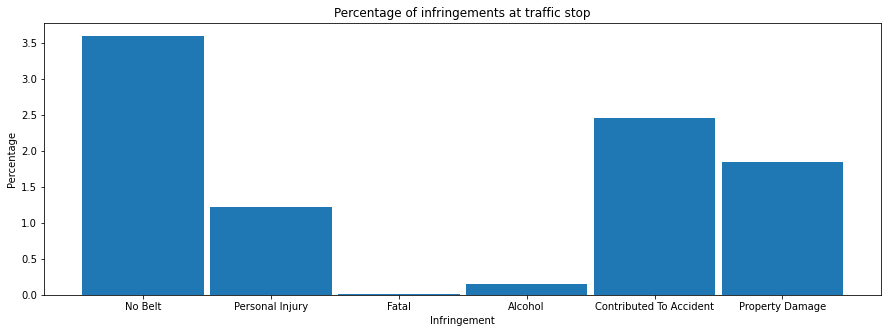

the percentage of each infringment at a traffic stop:
Belts                      3.598
Personal Injury            1.217
Fatal                      0.015
Alcohol                    0.144
Contributed To Accident    2.461
Property Damage            1.849
Name: mean, dtype: float64


In [51]:
description = data.describe()
interests = ["Belts", "Personal Injury", "Fatal", "Alcohol", "Contributed To Accident", "Property Damage"]
names = ["No Belt", "Personal Injury", "Fatal", "Alcohol", "Contributed To Accident", "Property Damage"]



percentages = round(description[interests].loc["mean"]*100,3)
percentages

plt.figure(figsize = (15,5))
plt.bar(names,percentages,width=0.95)
plt.xlabel("Infringement")
plt.title("Percentage of infringements at traffic stop") 
plt.ylabel("Percentage")

plt.show()

description
names = percentages.to_list()
print(f"the percentage of each infringment at a traffic stop:")
print(percentages)




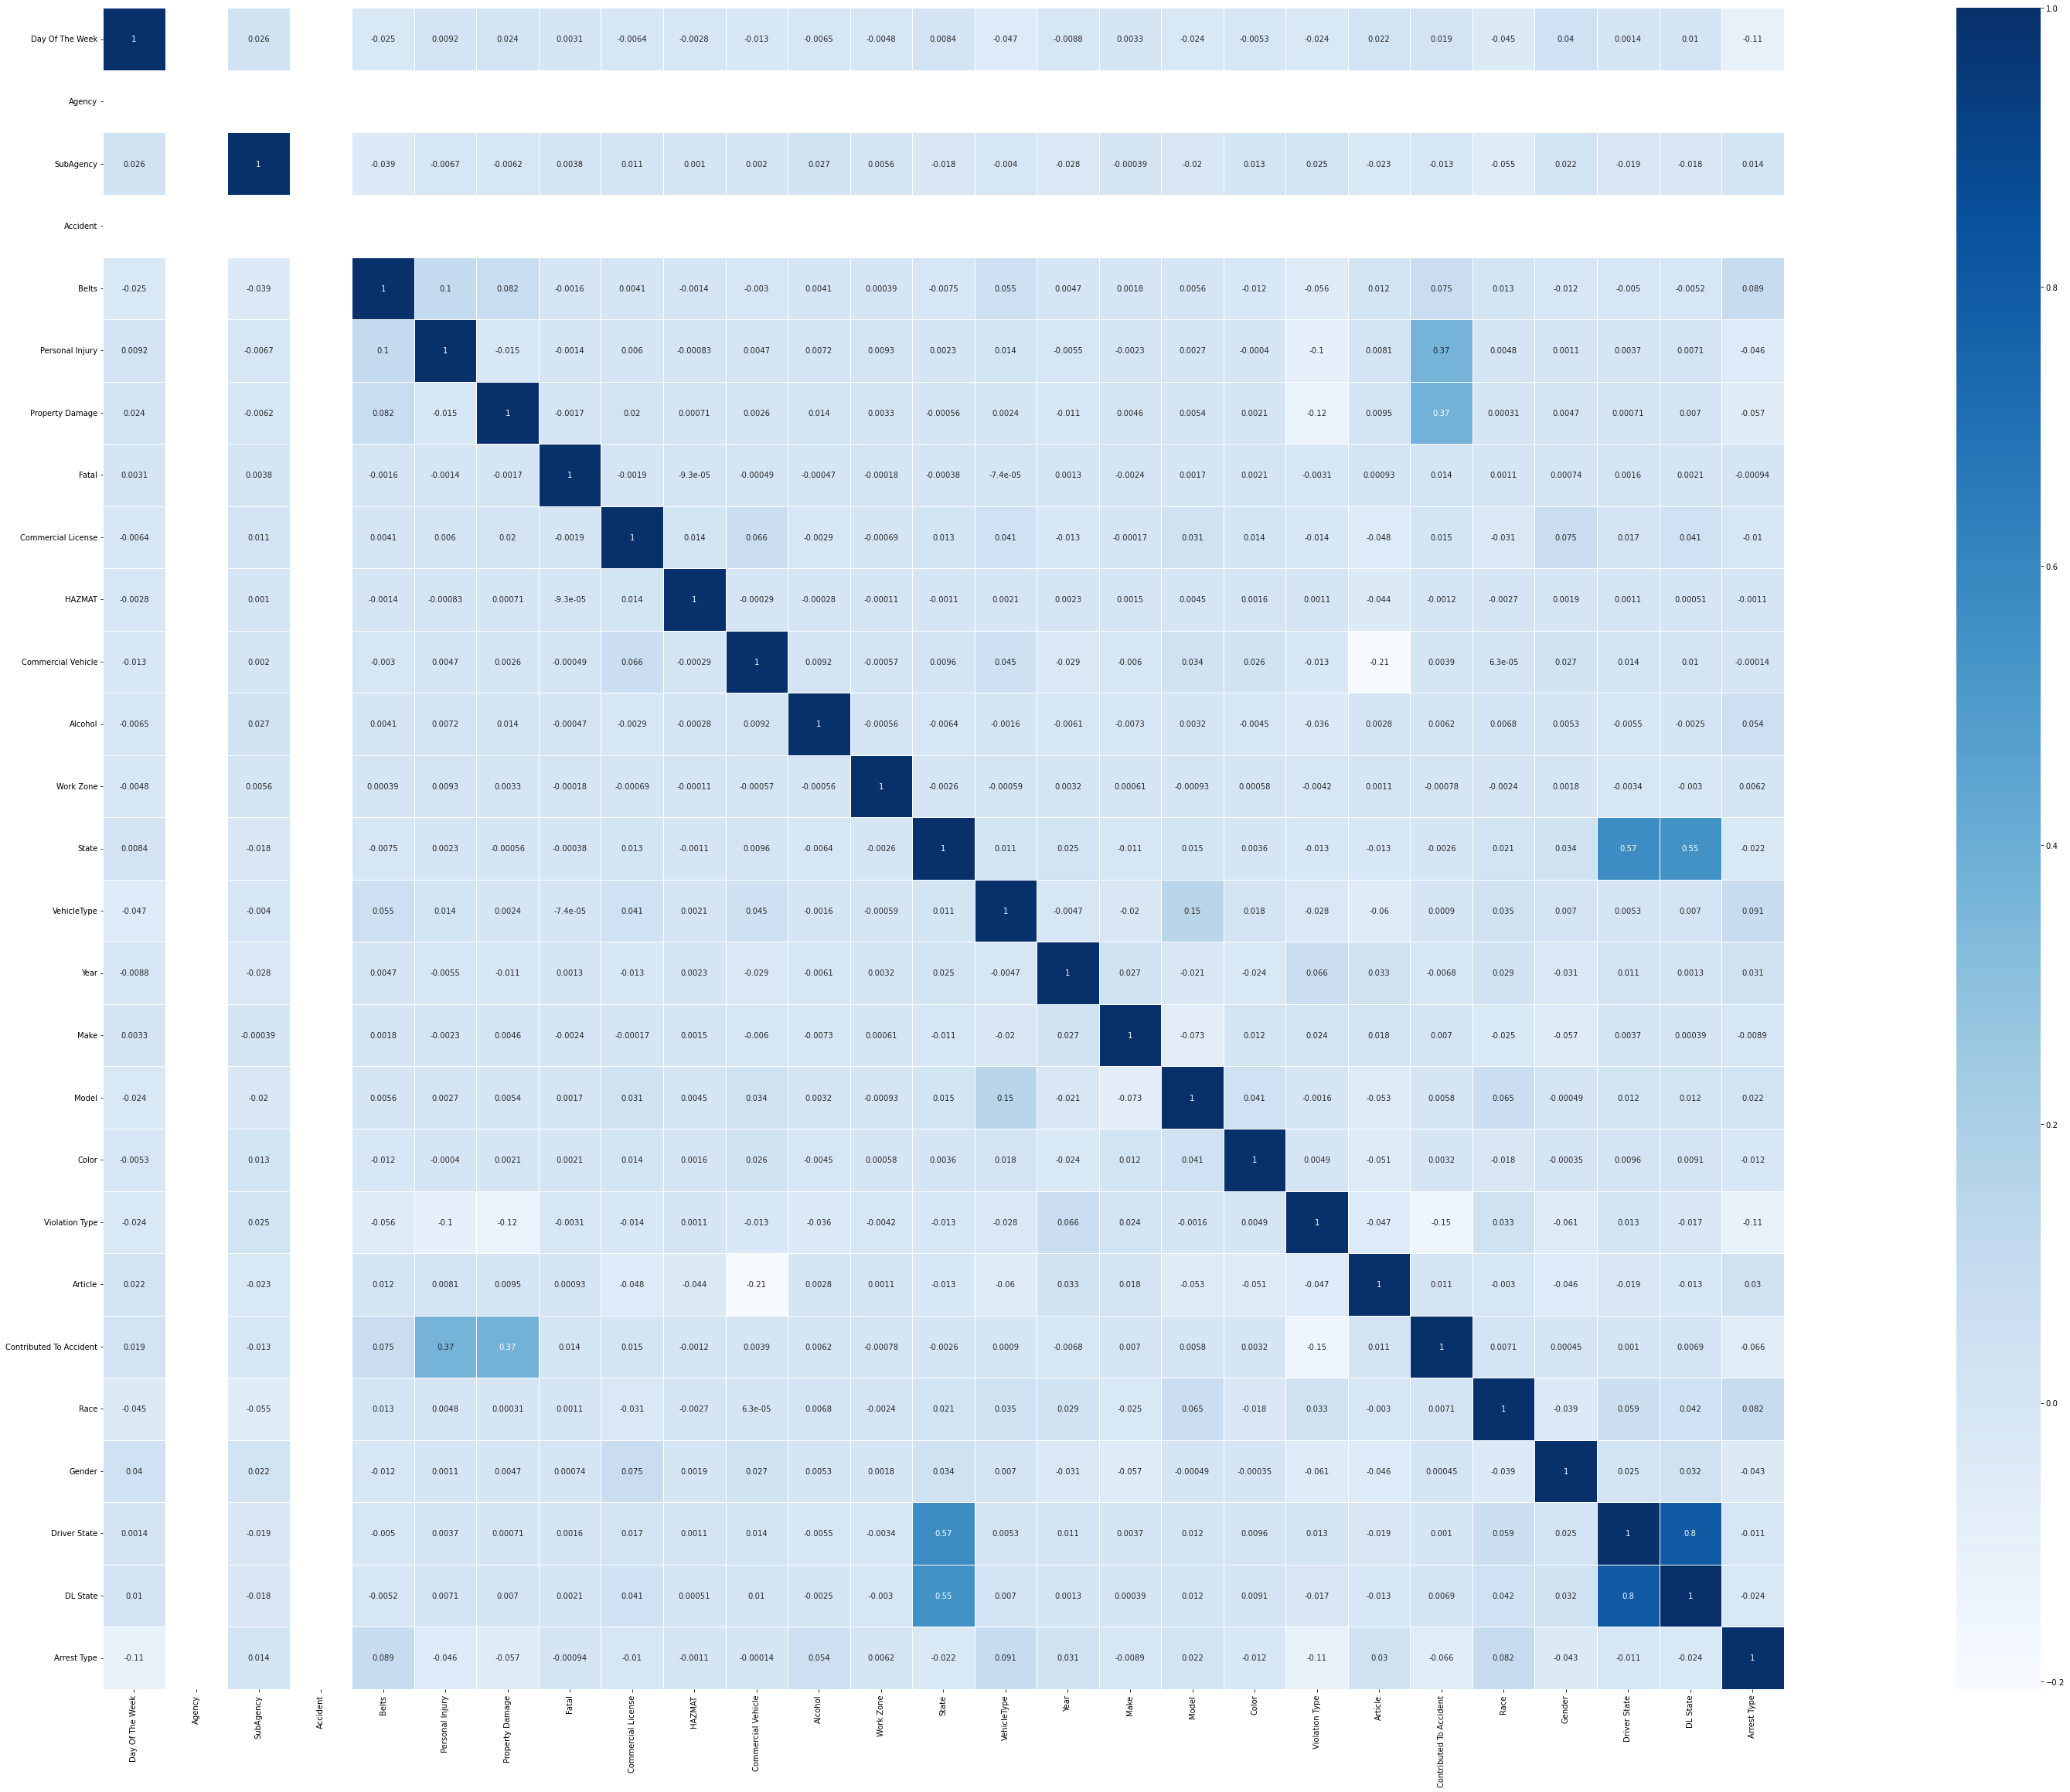

In [52]:
corrmatrix = data.corr()

plt.figure(figsize = (80,40))
sns.heatmap(corrmatrix, cmap = "Blues", square = True, linewidths=.5,annot=True)
plt.show()


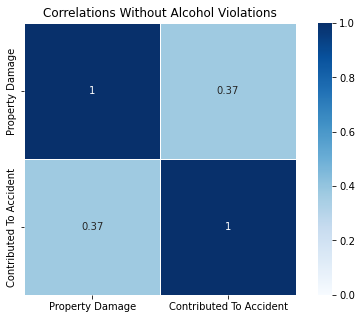

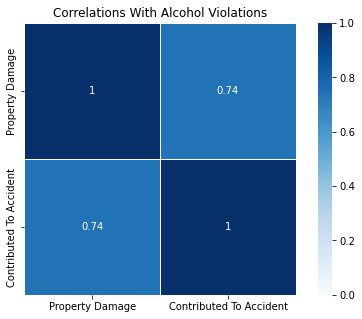

In [54]:
without_alcohol = data.loc[data["Alcohol"] == 0] 
with_alcohol = data.loc[data["Alcohol"] == 1] 

corr_without_alcohol = without_alcohol[["Property Damage", "Contributed To Accident"]].corr()
corr_with_alcohol = with_alcohol[["Property Damage", "Contributed To Accident"]].corr()

fig = plt.figure(figsize=(8,5))
sns.heatmap(corr_without_alcohol, annot=True, cmap='Blues', vmin=0, vmax=1, square = True, linewidths=.5)
plt.title('Correlations Without Alcohol Violations')
plt.show()

fig2 = plt.figure(figsize=(8,5))
sns.heatmap(corr_with_alcohol, annot=True, cmap='Blues', vmin=0, vmax=1, square = True, linewidths=.5)
plt.title('Correlations With Alcohol Violations')
plt.show()


#0 is no, 1 is yes 


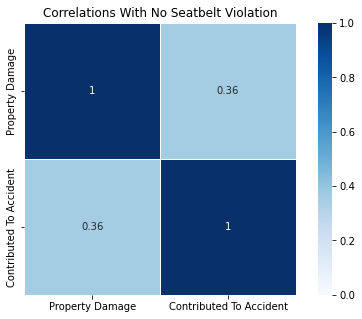

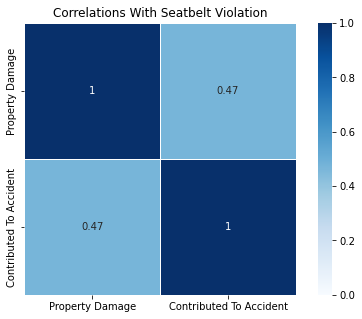

In [55]:
without_belts = data.loc[data["Belts"] == 0] 
with_belts = data.loc[data["Belts"] == 1] 

corr_without_belts = without_belts[["Property Damage", "Contributed To Accident"]].corr()
corr_with_belts = with_belts[[ "Property Damage", "Contributed To Accident"]].corr()


fig = plt.figure(figsize=(8,5))
sns.heatmap(corr_without_belts, annot=True, cmap='Blues', vmin=0, vmax=1, square = True, linewidths=.5)
plt.title('Correlations With No Seatbelt Violation')
plt.show()


fig2 = plt.figure(figsize=(8,5))
sns.heatmap(corr_with_belts, annot=True, cmap='Blues', vmin=0, vmax=1, square = True, linewidths=.5)
plt.title('Correlations With Seatbelt Violation')
plt.show()


In [20]:
import random 

#before proper label encoding was done, not all columns were numerical, so this would only select columns with numerical data 


#choose five random columns to predict 
columns = data.columns
col_numbers = random.sample(range(0, data.drop(columns = "Personal Injury").shape[1]),5)

#the five columns to test 
col_names = data.drop(columns = "Personal Injury").columns[col_numbers]
print("the columns chosen are: ")
print("")
for i in col_names:
    print(i)
    


the columns chosen are: 

Year
Model
HAZMAT
DL State
Work Zone


In [594]:
# injurred = data[data[Target] == 1]
# not_injurred = data[data[Target] == 0]

# injurred1 = injurred.sample(n=2000)
# not_injurred1 = not_injurred.sample(n=2000)

# data1 = [injurred1, not_injurred1]
# result = pd.concat(data1)


4000

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
total_number_of_trials = 0
total_ONE_number_of_trials = 0

best_features = []
best_ONE_features = []




In [22]:
from sklearn.metrics import accuracy_score, roc_auc_score 


def many_guassian(df, Target):
    global best_model_predicted
    global model_predicted
    global y_test
    global total_number_of_trials
    global acc_1
    global ave_acc_label
    
    ave_acc_label = 0
    acc = 0
    auc = 0
    best_accuracy_features = []
    best_auc_features = []
    all_accuracies = []
    all_aucs = []
    data_rows_injurred = []
    data_rows_not_injurred = []
    
    #note that if lines 23-31 are commented, then the gaussian model is trained on the entire data frame 
    #if the lines 23-31 are run, the the restricted gaussian model using 50:50 split of 4000 samples is used 
    injurred = df[df[Target] == 1]
    not_injurred = df[df[Target] == 0]

    injurred1 = injurred.sample(n=2000)
    not_injurred1 = not_injurred.sample(n=2000)

    data1 = [injurred1, not_injurred1]
    df = pd.concat(data1)
    df = df.sample(frac = 1)
    
    
    df_train, df_test = train_test_split(df, test_size = 0.3)

    loop = 20
    for i in range(loop):
        col_numbers = random.sample(range(1, data.drop(columns = Target).shape[1]),20)
        col_names = data.drop(columns = Target).columns[col_numbers]

        x_train = df_train[col_names].to_numpy()
        y_train = df_train[Target].to_numpy()

        x_test = df_test[col_names].to_numpy()
        y_test = df_test[Target].to_numpy()

        model = GaussianNB()
        model.fit(x_train,y_train)

        model_predicted = model.predict(x_test)
        model_probability = model.predict_proba(x_test)
    
        accuracy = accuracy_score(y_test,model_predicted)
        auc_score = roc_auc_score(y_test, model_probability[:, 1])
        
        nm = col_names.tolist()
        all_accuracies.append([nm,round(accuracy,3)])
        
        ave_acc_label += accuracy
        
        
        if accuracy > acc:
            acc = accuracy
            best_accuracy_features = col_names 
            best_model_predicted = model_predicted
            best_model_probability = model_probability
            
        
        if auc < auc_score:
            auc = auc_score
            best_auc_features = col_names
    total_number_of_trials += loop
    acc_1 = best_accuracy_features.to_numpy()
    auc1  = best_auc_features.tolist()
    
    ave_acc_label = ave_acc_label/loop
    
    all_accuracies.sort(key= lambda all_accuracies : all_accuracies[1], reverse=True)
    
    for i in range(0,round(len(all_accuracies)*0.2)):
        for j in all_accuracies[i]:
            print(j)
            print("")

    print(f'the best features for accuracy is: {acc_1}')
    print(f'This produces an accuracy of {acc:.3f}')
    print("")
    print(f'the best features for AUC is: {auc1}')
    print(f'producing an AUC of {auc:.3f}')
    print("")
    print(f"the average accuracy for all Guassian Models are: {round(ave_acc_label,3)}")
    return(None)           

many_guassian(data, "Personal Injury")
acc_1.tolist()
best_features.append(acc_1)


['Color', 'Commercial License', 'State', 'Model', 'VehicleType', 'Property Damage', 'Belts', 'Gender', 'Accident', 'Make', 'Agency', 'Contributed To Accident', 'Year', 'DL State', 'Commercial Vehicle', 'Violation Type', 'Arrest Type', 'Driver State', 'Race', 'Work Zone']

0.818

['Year', 'Contributed To Accident', 'Commercial License', 'Driver State', 'Make', 'SubAgency', 'Race', 'Work Zone', 'Belts', 'Commercial Vehicle', 'Violation Type', 'Accident', 'Model', 'Property Damage', 'Alcohol', 'Color', 'VehicleType', 'DL State', 'Arrest Type', 'State']

0.818

['Race', 'SubAgency', 'Work Zone', 'Driver State', 'Gender', 'Violation Type', 'Commercial Vehicle', 'Fatal', 'HAZMAT', 'VehicleType', 'Alcohol', 'Belts', 'Commercial License', 'Model', 'Make', 'Article', 'Year', 'Color', 'Accident', 'Contributed To Accident']

0.751

['VehicleType', 'Accident', 'Driver State', 'Arrest Type', 'SubAgency', 'Work Zone', 'Make', 'Violation Type', 'Commercial Vehicle', 'Belts', 'Contributed To Accident'

total occurances of Day Of The Week is: 0
total occurances of Agency is: 1
total occurances of SubAgency is: 0
total occurances of Accident is: 1
total occurances of Belts is: 1
total occurances of Property Damage is: 1
total occurances of Fatal is: 0
total occurances of Commercial License is: 1
total occurances of HAZMAT is: 0
total occurances of Commercial Vehicle is: 1
total occurances of Alcohol is: 0
total occurances of Work Zone is: 1
total occurances of State is: 1
total occurances of VehicleType is: 1
total occurances of Year is: 1
total occurances of Make is: 1
total occurances of Model is: 1
total occurances of Color is: 1
total occurances of Violation Type is: 1
total occurances of Article is: 0
total occurances of Contributed To Accident is: 1
total occurances of Race is: 1
total occurances of Gender is: 1
total occurances of Driver State is: 1
total occurances of DL State is: 1
total occurances of Arrest Type is: 1
the number of iterations is:  20


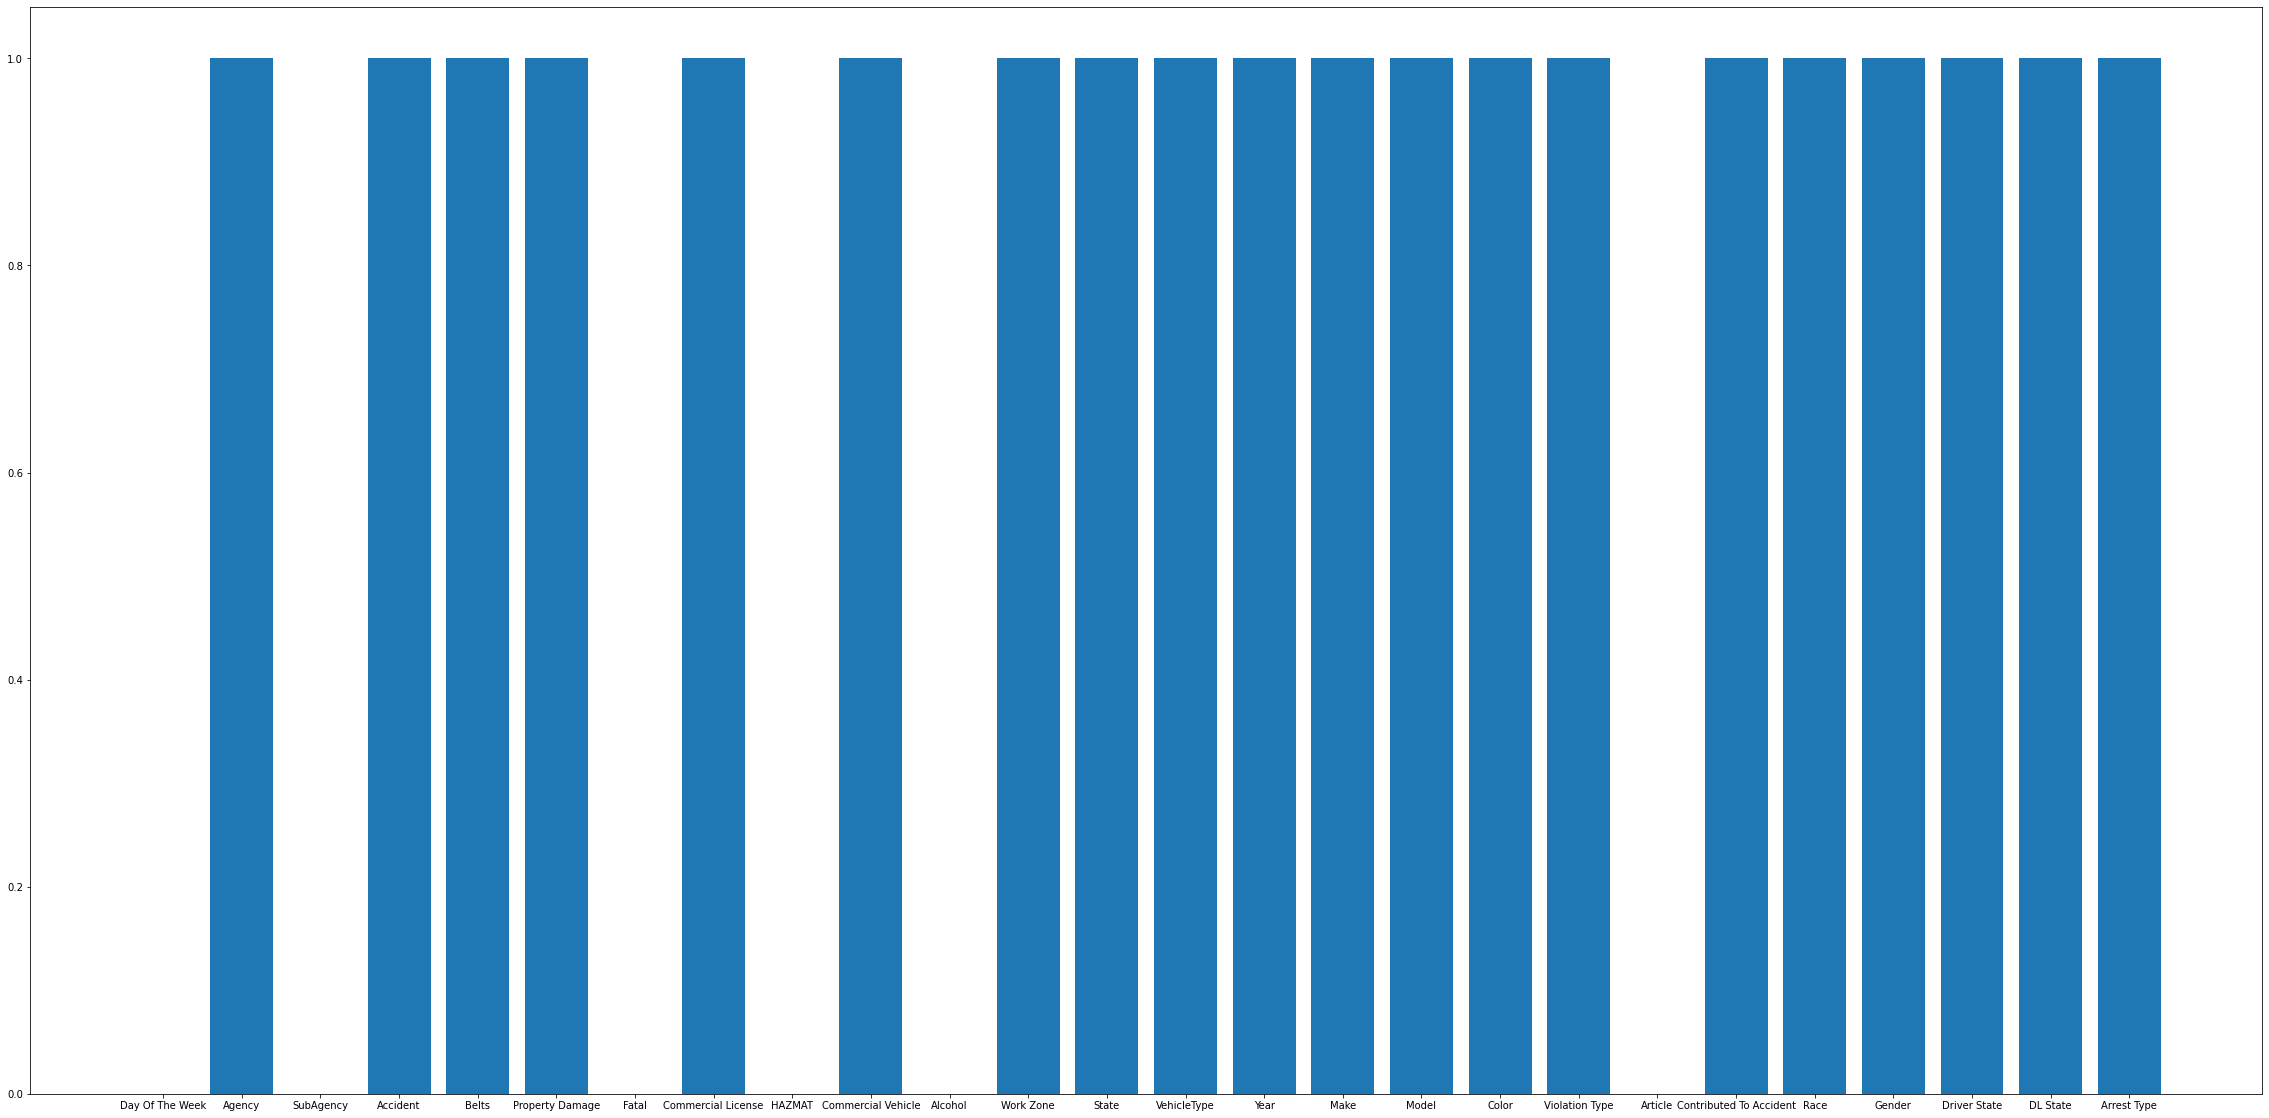

In [23]:
#this code essenially keeps track of the best 5 features when iterating in the above Gaussian model. 
#if the code is run enough times, start to see which features commonly appear in the best Gaussian model 
#for the Label encoded data, should find that only Contributed to accident and Seatbelts appear more often
features = data.columns

np_features = np.array(best_features)
count = np.count_nonzero(np_features == "Year")
# print('Total occurences of "3" in array: ', count)

bars_data = []
labels = []
for i in features:
    if i == "Personal Injury":
        continue
    count = np.count_nonzero(np_features == i)
    print(f'total occurances of {i} is: {count}')
    labels.append(i)
    bars_data.append(count)
    

plt.figure(figsize=(40,20))
plt.bar(labels, bars_data)
print("the number of iterations is: ", total_number_of_trials)

612
588
406
794


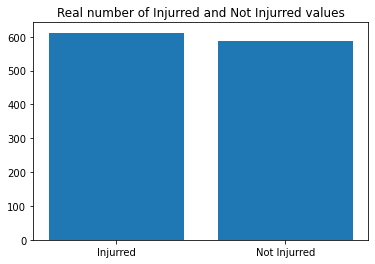

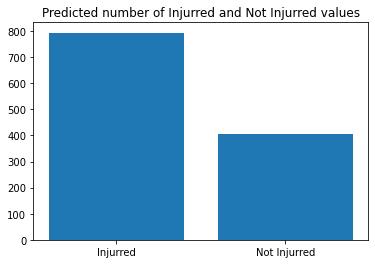

In [31]:
y_test_Injurred = y_test[y_test == 1]
y_test_Not_Injurred = y_test[y_test == 0]

print(y_test_Injurred.shape[0])
print(y_test_Not_Injurred.shape[0])


pred_Not_injurred = best_model_predicted[best_model_predicted == 0]
pred_Injurred = best_model_predicted[best_model_predicted == 1]

print(pred_Not_injurred.shape[0])
print(pred_Injurred.shape[0])

# print(y_test_Not_Injurred.shape[0])


plt.bar(["Injurred", "Not Injurred"],[y_test_Injurred.shape[0],y_test_Not_Injurred.shape[0]])
plt.title("Real number of Injurred and Not Injurred values")

plt.show()
plt.bar(["Injurred", "Not Injurred"], [pred_Injurred.shape[0],pred_Not_injurred.shape[0]])
plt.title("Predicted number of Injurred and Not Injurred values")
plt.show()



In [32]:
col_names = 0
def many_ONE_guassian(df, Target_ONE):
    global best_model_predicted_ONE
    global y_test_ONE
    global model_predicted_ONE
    global ave_ONE_accuracy
    global total_ONE_number_of_trials
    global best_accuracy_features_ONE
    global acc_1
    
    ave_one_accuracy = 0
    acc = 0
    auc = 0
    best_accuracy_features_ONE = []
    best_auc_features_ONE = []
    all_accuracies = []
    all_aucs = []
    

    
    loop = 5
    
    for i in range(loop):
        col_numbers = random.sample(range(1, df.drop(columns = Target_ONE).shape[1]),5)
        col_ONE_names = df.drop(columns = Target_ONE).columns[col_numbers]
    
        df_train_ONE, df_test_ONE = train_test_split(df, test_size = 0.3)
        
        x_train_ONE = df_train_ONE[col_ONE_names].to_numpy()
        y_train_ONE = df_train_ONE[Target_ONE].to_numpy()
        
        x_test_ONE = df_test_ONE[col_ONE_names].to_numpy()
        y_test_ONE = df_test_ONE[Target_ONE].to_numpy()
        
        model_ONE_hot_enc = GaussianNB()
        model_ONE_hot_enc.fit(x_train_ONE,y_train_ONE)

        model_predicted_ONE = model_ONE_hot_enc.predict(x_test)
        model_probability_ONE = model_ONE_hot_enc.predict_proba(x_test)
        
        
        accuracy_ONE = accuracy_score(y_test_ONE,model_predicted_ONE)
        auc_score_ONE = roc_auc_score(y_test_ONE, model_probability_ONE[:, 1])
        
        
        nm_ONE = col_ONE_names.tolist()
        all_accuracies.append([nm_ONE,round(accuracy_ONE,3)])
        
        
        if accuracy_ONE > acc:
            acc = accuracy_ONE
            best_accuracy_features_ONE = col_ONE_names 
            best_model_predicted_ONE = model_predicted_ONE
            best_model_probability_ONE = model_probability_ONE
            
        
        if auc < auc_score_ONE:
            auc = auc_score_ONE
            best_auc_features_ONE = col_ONE_names
            
        ave_one_accuracy += acc
    
    total_ONE_number_of_trials += loop
    ave_one_accuracy = ave_one_accuracy/loop


    acc_1 = best_accuracy_features_ONE.to_numpy()
    auc1  = best_auc_features_ONE.tolist()
    
    
    all_accuracies.sort(key= lambda all_accuracies : all_accuracies[1], reverse=True)
    
    
    
    for i in range(0,round(len(all_accuracies)*0.2)):
        for j in all_accuracies[i]:
           print(j)
    print("")

    print(f'the best features for accuracy is: {acc_1}')
    print(f'this produces an accuracy of {acc:.3f}')
    print("")
    
    print(f'the best features for auc is: {auc1}')
    print(f'This produces an accuracy of {auc:.3f}')
    print("")
    
    print(f"the average accuracy of the Gaussian One Hot Encoded Model is: {ave_one_accuracy:.3f}")
    return(None)           
        

    
    
    
    



many_ONE_guassian(encoded,"Personal Injury")
acc_1.tolist()
best_ONE_features.append(acc_1)
# best_ONE_features



ValueError: Unknown label type: (array([0, 1], dtype=object),)

168689
2108
170739
58


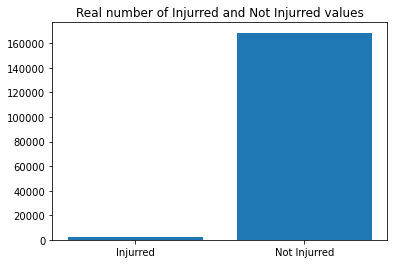

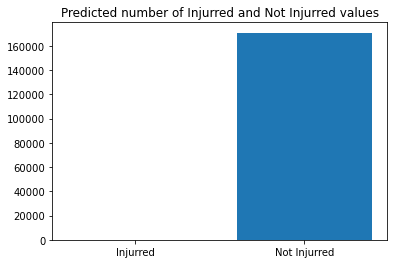

In [574]:

y_test_Injurred = y_test_ONE[y_test_ONE == 1]
y_test_Not_Injurred_ONE = y_test_ONE[y_test_ONE == 0]

pred_Not_injurred_ONE = best_model_predicted_ONE[best_model_predicted_ONE == 0]
pred_Injurred_ONE = best_model_predicted_ONE[best_model_predicted_ONE == 1]

print(y_test_Not_Injurred_ONE.shape[0])
print(y_test_Injurred.shape[0])
print(pred_Not_injurred_ONE.shape[0])
print(pred_Injurred_ONE.shape[0])



plt.bar(["Injurred", "Not Injurred"],[y_test_Injurred.shape[0],y_test_Not_Injurred_ONE.shape[0]])
plt.title("Real number of Injurred and Not Injurred values")
plt.show()

plt.bar(["Injurred", "Not Injurred"], [pred_Injurred_ONE.shape[0],pred_Not_injurred_ONE.shape[0]])
plt.title("Predicted number of Injurred and Not Injurred values")
plt.show()

total occurances of SubAgency_2 is: 2
total occurances of Personal Injury_1 is: 1
total occurances of HAZMAT_1 is: 1
total occurances of State_1 is: 2
total occurances of State_5 is: 1
total occurances of State_6 is: 1
total occurances of State_9 is: 1
total occurances of State_11 is: 1
total occurances of State_14 is: 1
total occurances of State_33 is: 1
total occurances of State_35 is: 1
total occurances of State_38 is: 1
total occurances of State_45 is: 1
total occurances of State_54 is: 1
total occurances of State_60 is: 1
total occurances of State_61 is: 1
total occurances of State_66 is: 1
total occurances of VehicleType_13 is: 2
total occurances of VehicleType_14 is: 1
total occurances of VehicleType_24 is: 1
total occurances of VehicleType_25 is: 1
total occurances of Make_3 is: 1
total occurances of Make_11 is: 1
total occurances of Make_22 is: 1
total occurances of Make_29 is: 1
total occurances of Make_38 is: 1
total occurances of Make_48 is: 1
total occurances of Make_63 is

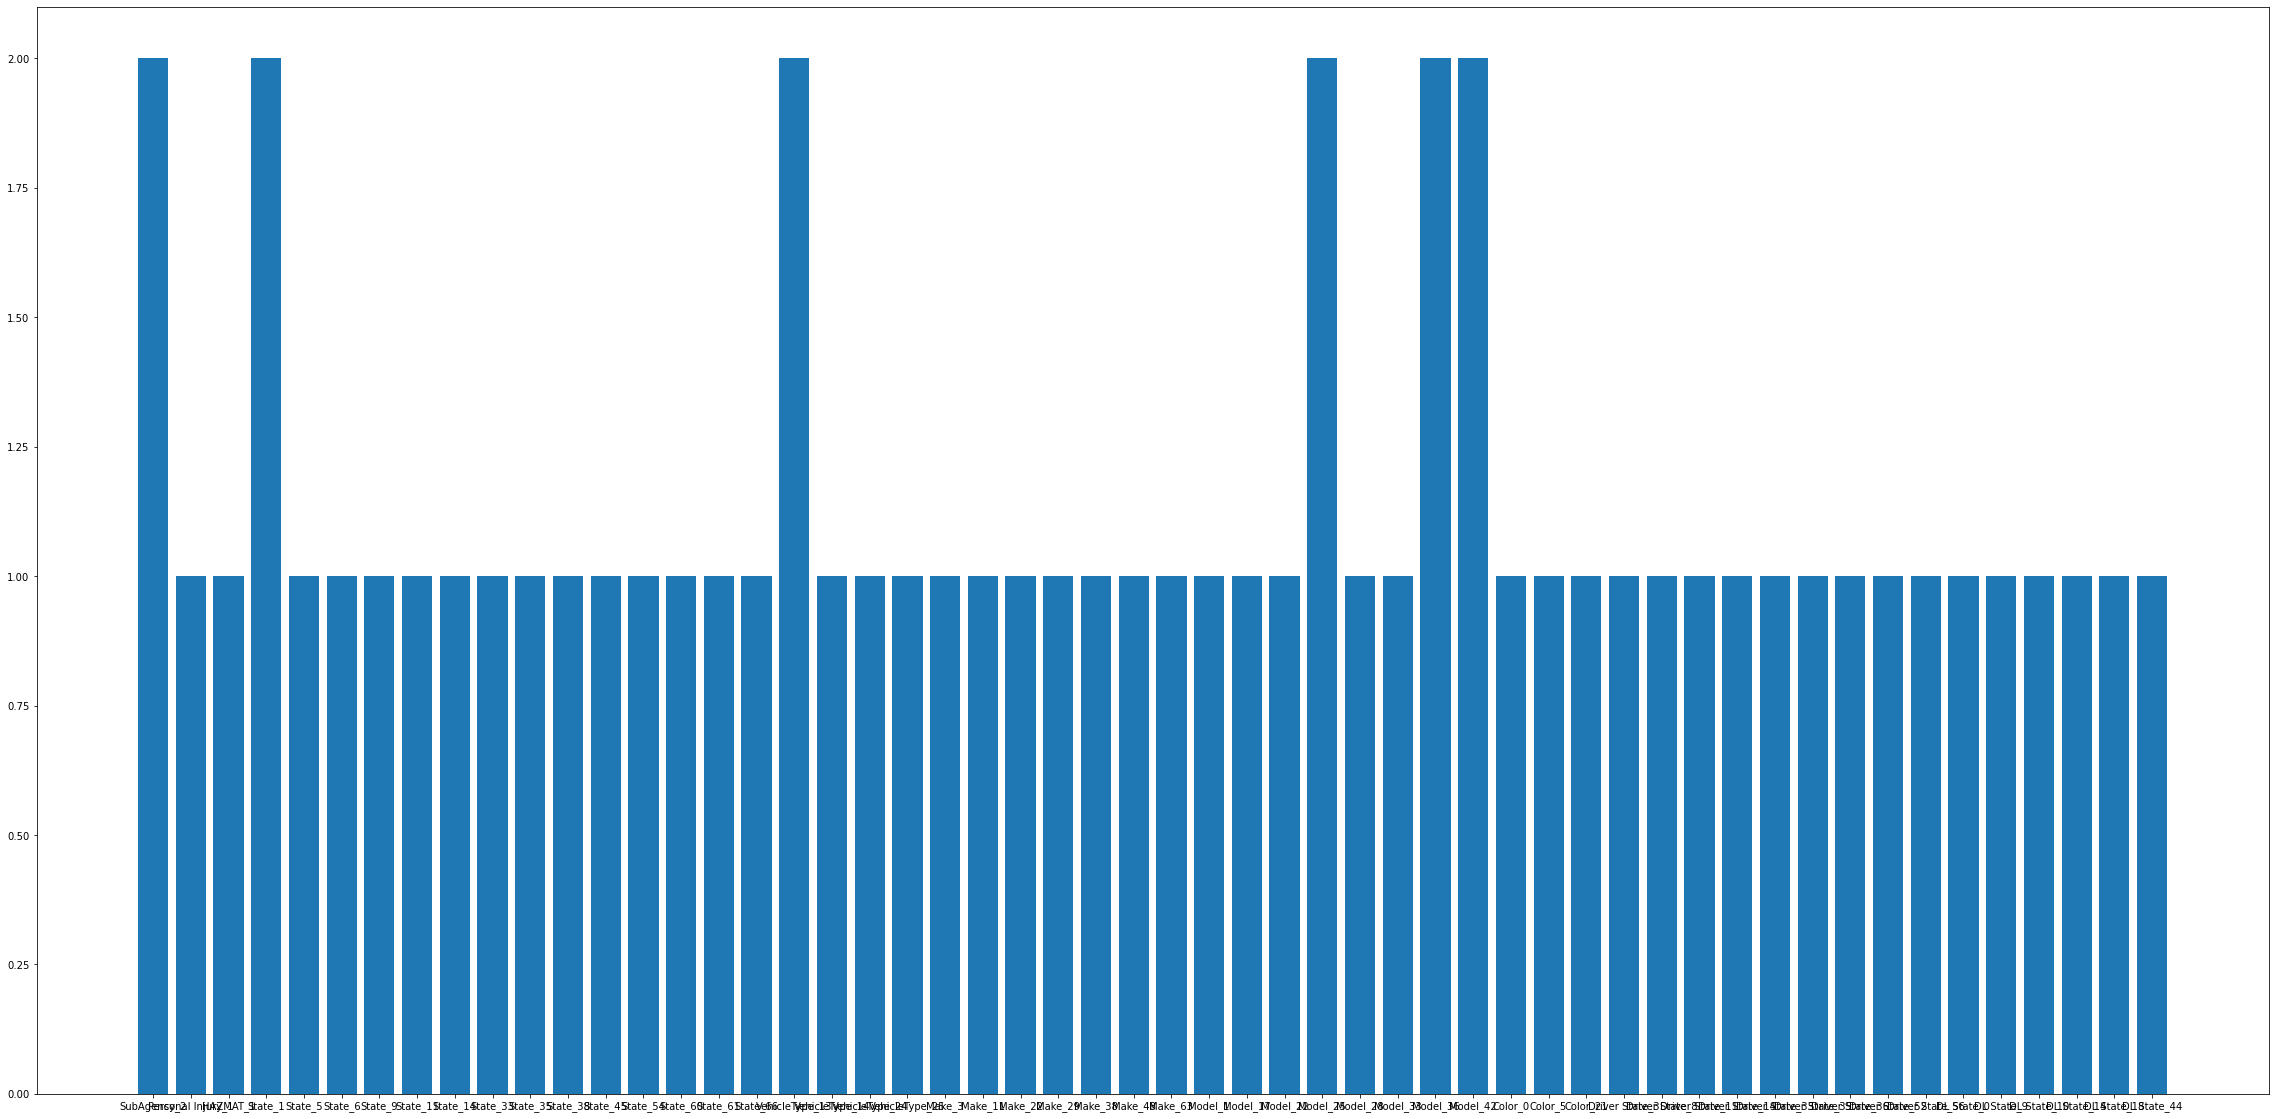

In [580]:
#same as above: this code essenially keeps track of the best 5 features when iterating in the above Gaussian model. 
#if the code is run enough times, start to see which features commonly appear in the best Gaussian model 
#for the One-hot encoded data, should find that no features appear more often - feature selection does not greatly influence model accuracy
features = encoded.columns

np_features = np.array(best_ONE_features)
count = np.count_nonzero(np_features == "Year")
# print('Total occurences of "3" in array: ', count)

bars_data = []
labels = []
for i in features:
    if i == "Personal Injury":
        continue
    count = np.count_nonzero(np_features == i)
    if count == 0:
        continue
    print(f'total occurances of {i} is: {count}')
    labels.append(i)
    bars_data.append(count)
    

plt.figure(figsize=(40,20))
plt.bar(labels, bars_data)
print("the number of iterations is: ", total_number_of_trials)